In [1]:
pip install pandas matplotlib seaborn statsmodels scikit-learn

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
# Carga el dataset
df_orig = pd.read_csv("/content/CSV/avocado.csv")
df_orig

# Copia del dataframe para preservar datos originales
df = df_orig.copy()

## 2. Gráficos para Visualización de Datos

**Gráfico de Violín de Volumen de Ventas por Región**

In [29]:
region_classification = {
    'Albany': 'City',
    'Atlanta': 'City',
    'BaltimoreWashington': 'Region',
    'Boise': 'City',
    'Boston': 'City',
    'BuffaloRochester': 'Region',
    'California': 'GreaterRegion',
    'Charlotte': 'City',
    'Chicago': 'City',
    'CincinnatiDayton': 'Region',
    'Columbus': 'City',
    'DallasFtWorth': 'Region',
    'Denver': 'City',
    'Detroit': 'City',
    'GrandRapids': 'City',
    'GreatLakes': 'GreaterRegion',
    'HarrisburgScranton': 'Region',
    'HartfordSpringfield': 'Region',
    'Houston': 'City',
    'Indianapolis': 'City',
    'Jacksonville': 'City',
    'LasVegas': 'City',
    'LosAngeles': 'City',
    'Louisville': 'City',
    'MiamiFtLauderdale': 'Region',
    'Midsouth': 'GreaterRegion',
    'Nashville': 'City',
    'NewOrleansMobile': 'Region',
    'NewYork': 'City',
    'Northeast': 'GreaterRegion',
    'NorthernNewEngland': 'Region',
    'Orlando': 'City',
    'Philadelphia': 'City',
    'PhoenixTucson': 'Region',
    'Pittsburgh': 'City',
    'Plains': 'GreaterRegion',
    'Portland': 'City',
    'RaleighGreensboro': 'Region',
    'RichmondNorfolk': 'Region',
    'Roanoke': 'City',
    'Sacramento': 'City',
    'SanDiego': 'City',
    'SanFrancisco': 'City',
    'Seattle': 'City',
    'SouthCarolina': 'State',
    'SouthCentral': 'GreaterRegion',
    'Southeast': 'GreaterRegion',
    'Spokane': 'City',
    'StLouis': 'City',
    'Syracuse': 'City',
    'Tampa': 'City',
    'TotalUS': 'TotalUS',
    'West': 'GreaterRegion',
    'WestTexNewMexico': 'Region'
}
def get_regions(name):
  cat_region = region_classification.get(name)
  return cat_region

In [30]:
# Añade columna con categorización de City/Region/GreaterRegion/TotalUS
df['region_type'] = df['region'].transform(lambda x: get_regions(x))

df['Date'] = pd.to_datetime(df['Date'])

df_filtered = df[df['region_type'] == 'GreaterRegion']


First Few Rows:
          region  Total Volume
0    California  1.028982e+09
1    GreatLakes  5.896425e+08
2      Midsouth  5.083494e+08
3     Northeast  7.132809e+08
4        Plains  3.111885e+08
5  SouthCentral  1.011280e+09
6     Southeast  6.152384e+08
7          West  1.086779e+09


<ipython-input-31-c17046073b33>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='region', y='Total Volume', palette='coolwarm')


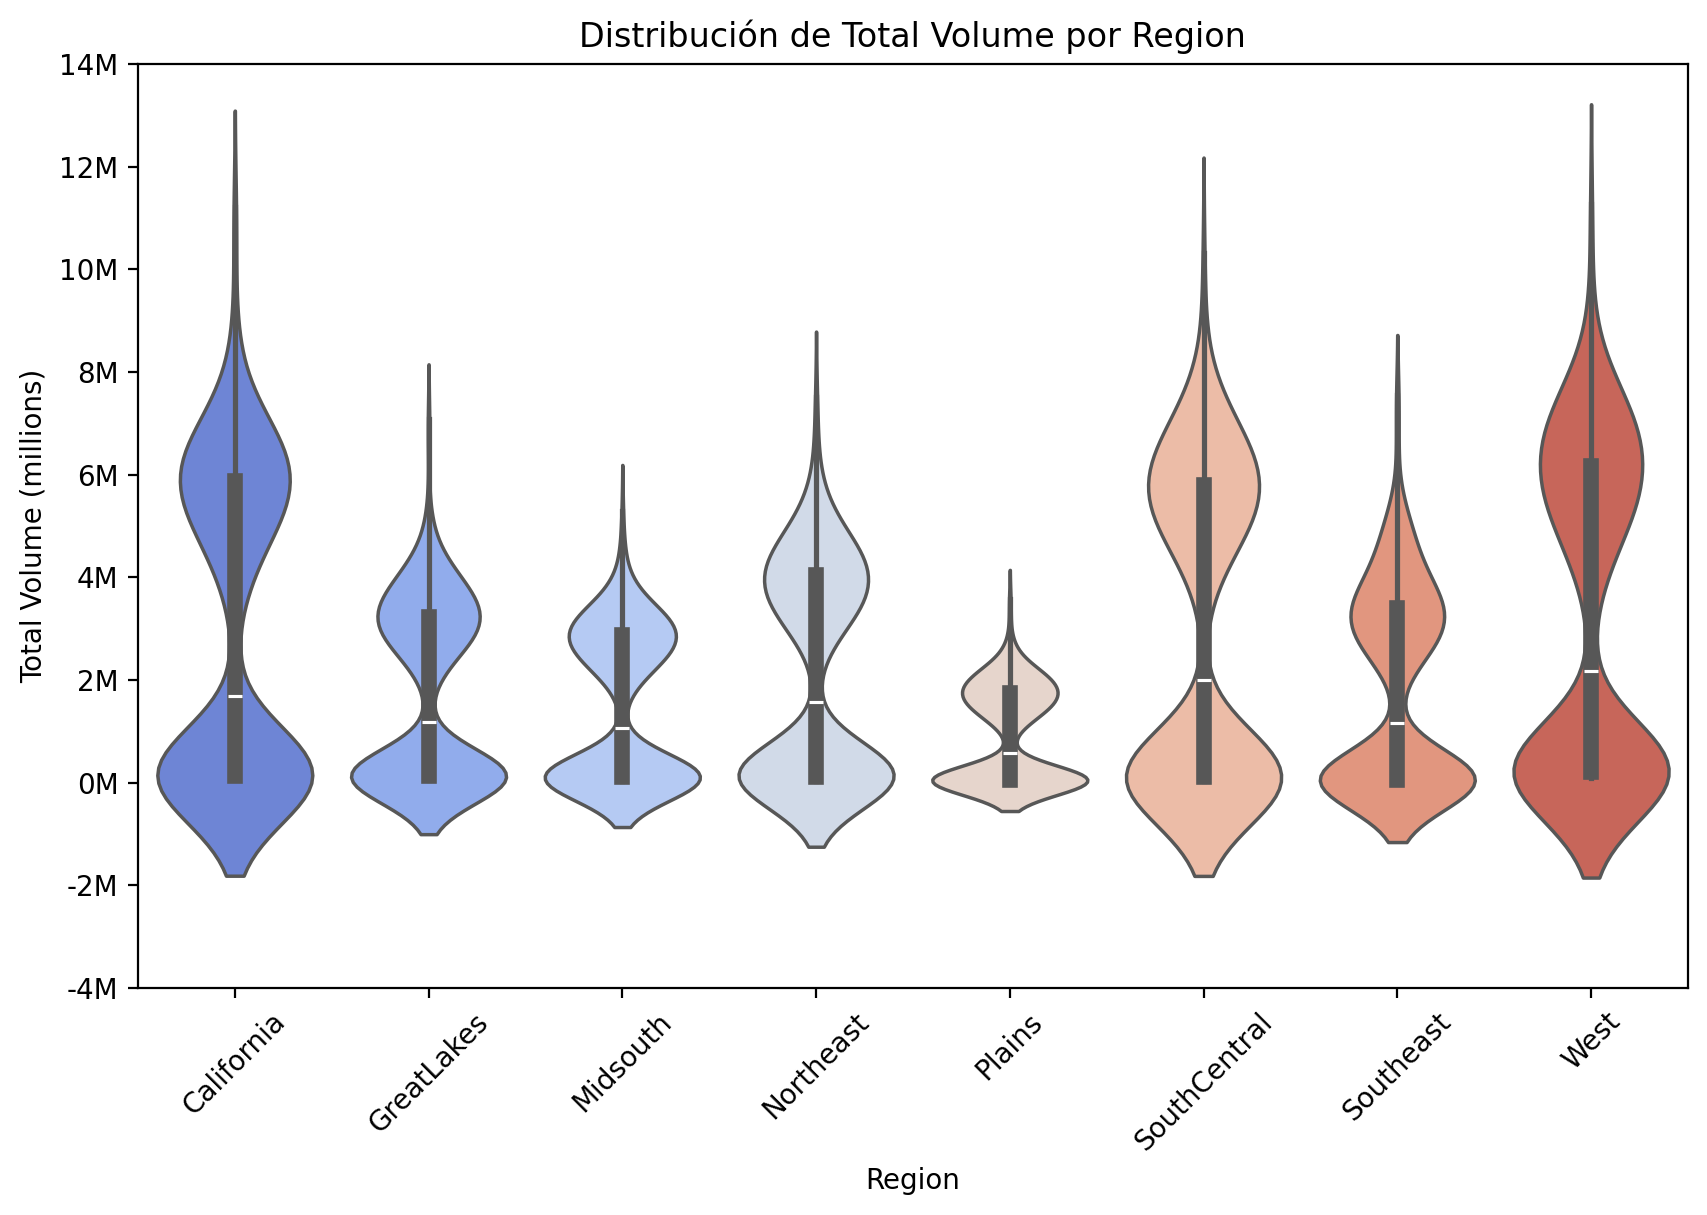

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar los datos por 'region' y calcular Total Volume
df_grouped = df_filtered.groupby(['region'], as_index=False)['Total Volume'].sum()

print("\nFirst Few Rows:\n", df_grouped.head(50))

# Crear gráfico de violín usando los datos originales
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_filtered, x='region', y='Total Volume', palette='coolwarm')

# Configuración del gráfico
plt.title('Distribución de Total Volume por Region')
plt.xlabel('Region')
plt.ylabel('Total Volume (millions)')

# Convertir Total Volume a millones para el eje y
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(tick/1_000_000)}M' for tick in plt.yticks()[0]])

plt.xticks(rotation=45)  # Rotar las etiquetas
plt.show()

**Boxplot Comparativo de Precios entre Años**

Text(0, 0.5, 'Precio Promedio')

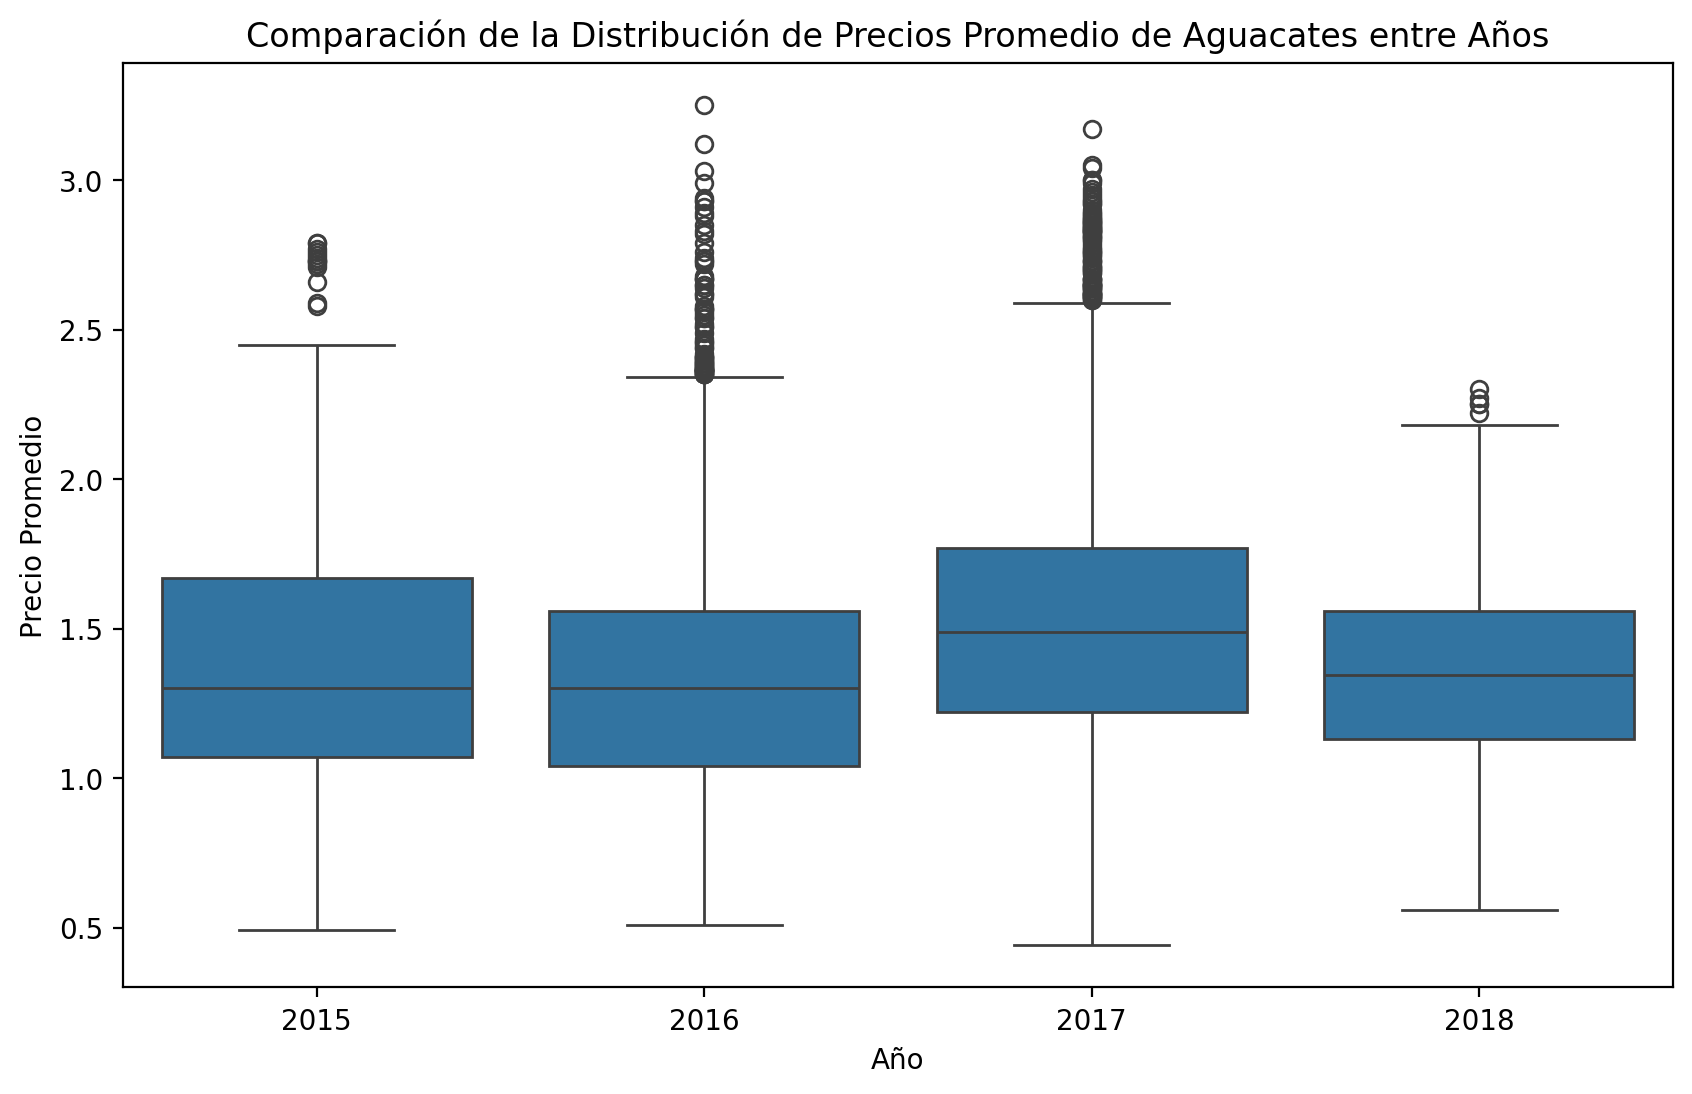

In [32]:
#codigo
# Indico el tamaño del grafico
plt.figure(figsize=(10, 6))

# Boxplot de precios promedio por año
sns.boxplot(x='year', y='AveragePrice', data=df)

plt.title('Comparación de la Distribución de Precios Promedio de Aguacates entre Años')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')

**Histograma de Volumen Total de Ventas**

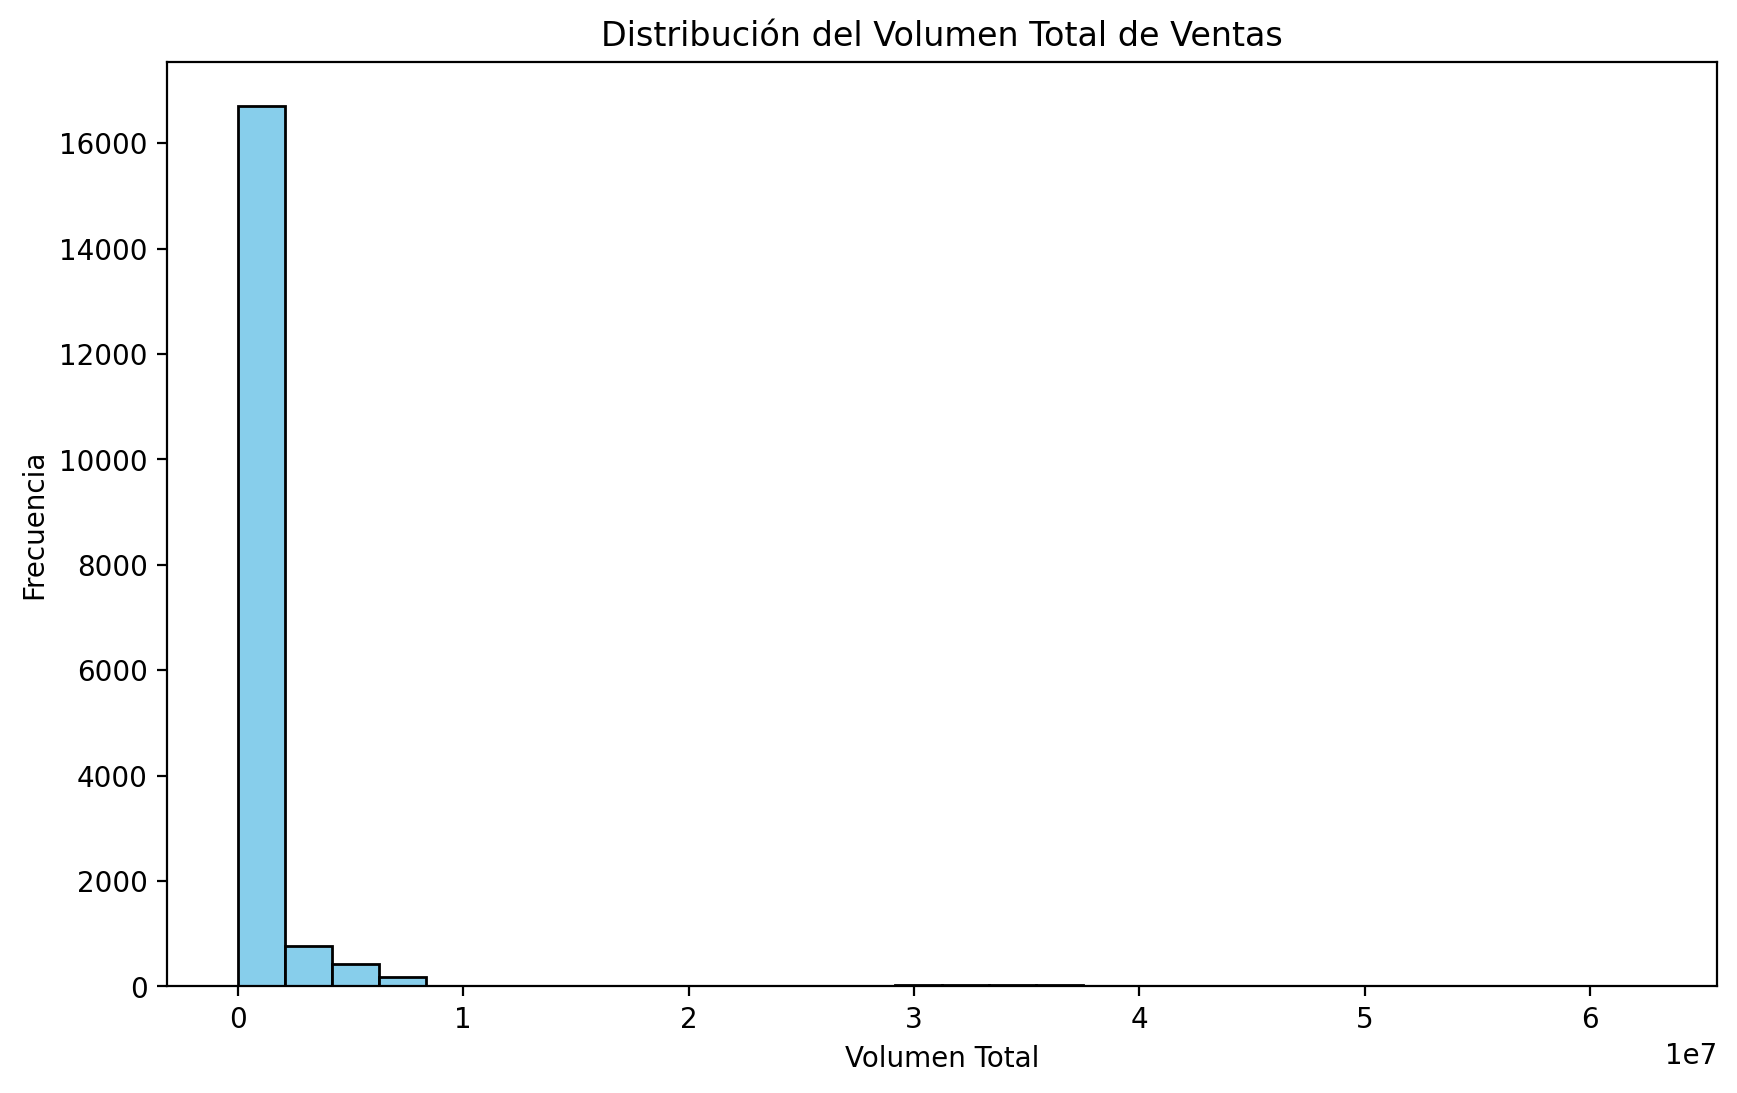

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df['Total Volume'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del Volumen Total de Ventas')
plt.xlabel('Volumen Total')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df_cp = av.df("df_cp")
average_price_by_type = df_cp.groupby('type')['AveragePrice'].mean()
print(average_price_by_type)

plt.figure(figsize=(10, 6))
plt.hist(
    [df_cp_cleaned[df_cp_cleaned['type'] == 'conventional']['AveragePrice'],
     df_cp_cleaned[df_cp_cleaned['type'] == 'organic']['AveragePrice']],
    bins=100, label=['Conventional', 'Organic'], alpha=0.9
)

# Add titles and labels
plt.title("Histogram of Average Avocado Prices by Type", fontweight = "bold")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.grid()
plt.show()

**Gráfico de Barras de Ventas por Tipo de Bolsa**

{'Total Bags': 1638600782.2499998, 'Small Bags': 1243561254.2700002, 'Large Bags': 373584295.4100001, 'XLarge Bags': 21455232.57}


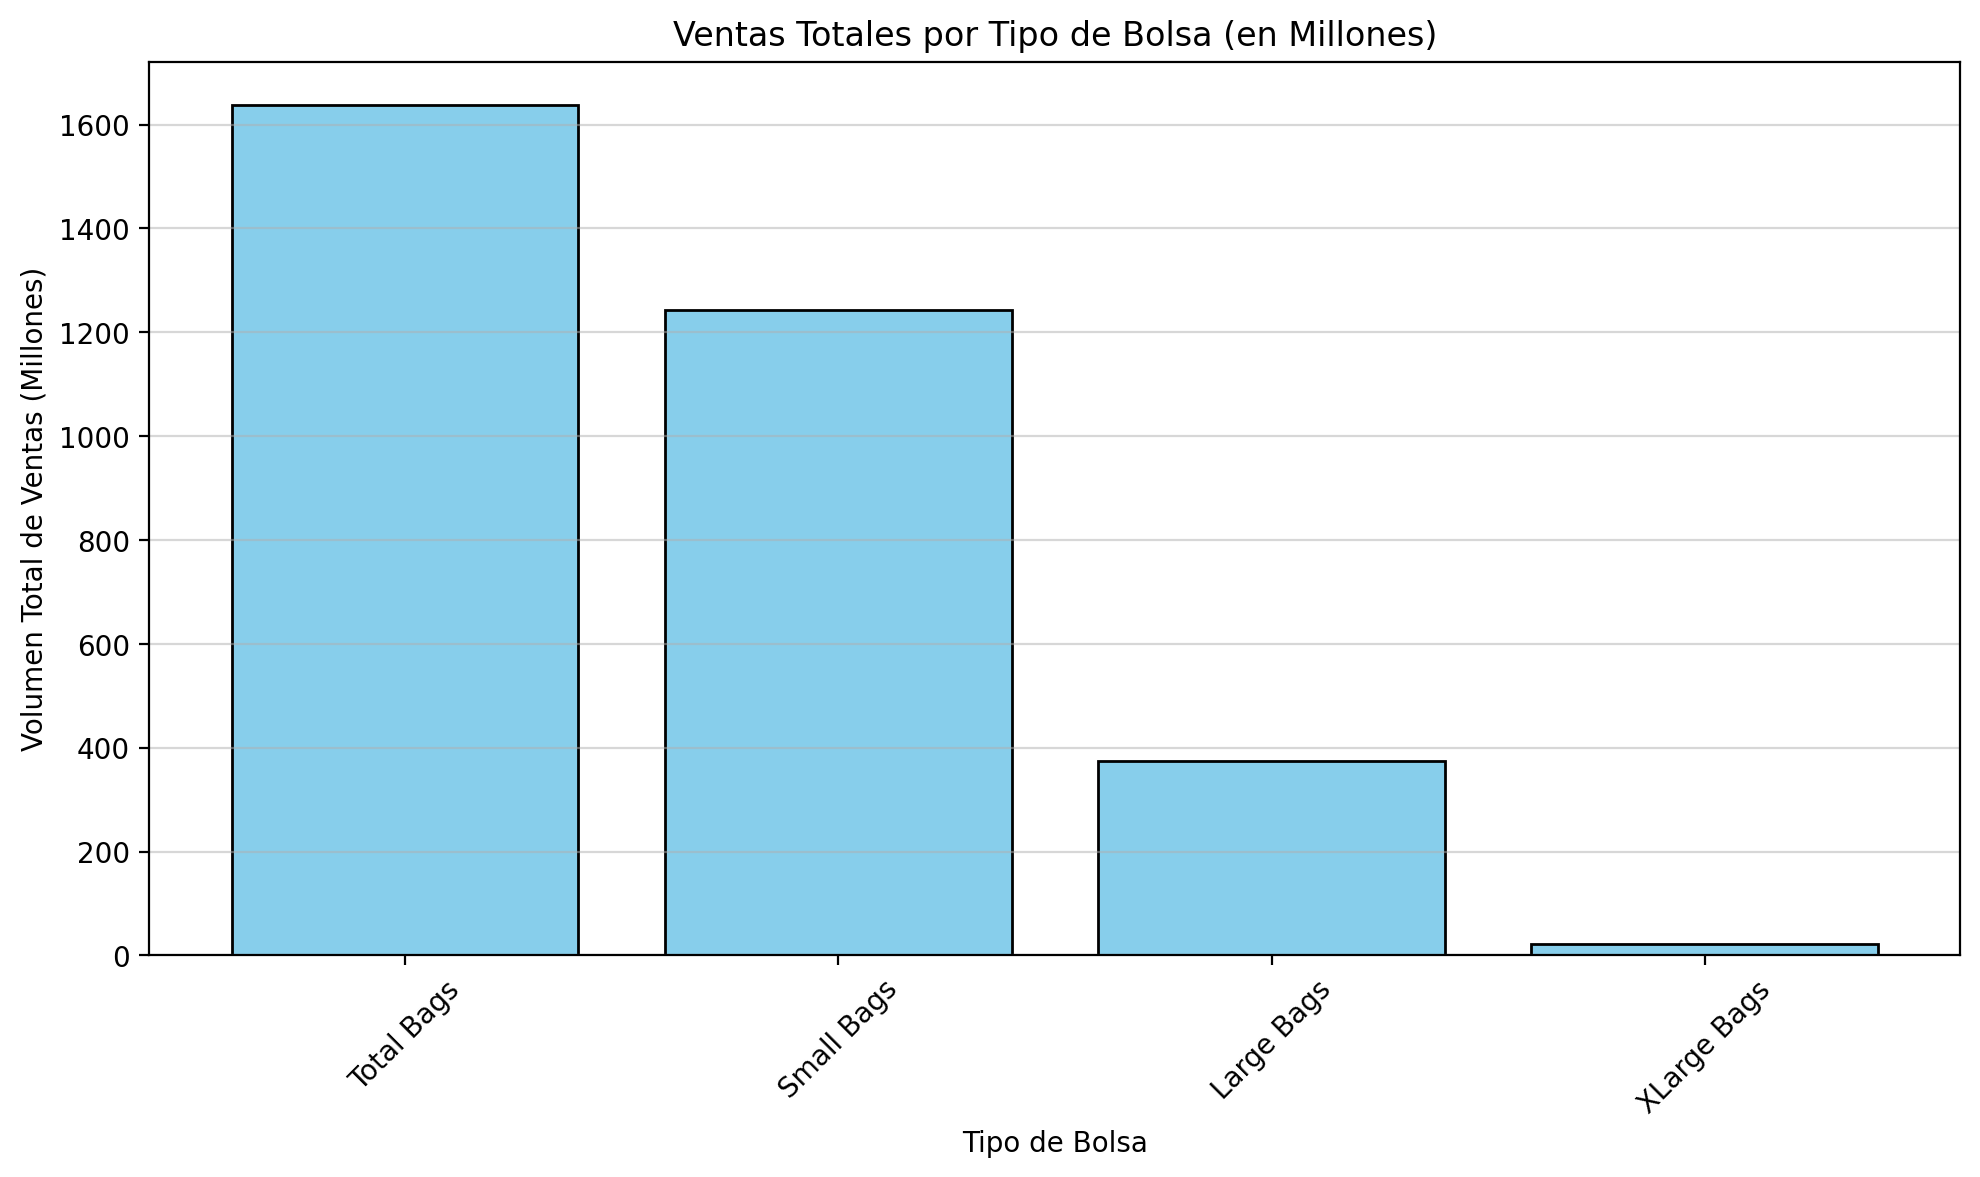

In [35]:
# Sumar los volúmenes de ventas para cada tipo de bolsa
bag_sales = {
    'Total Bags': df_filtered['Total Bags'].sum(),
    'Small Bags': df_filtered['Small Bags'].sum(),
    'Large Bags': df_filtered['Large Bags'].sum(),
    'XLarge Bags': df_filtered['XLarge Bags'].sum()
}
print(bag_sales)

# Extraer etiquetas y valores
bag_types = list(bag_sales.keys())
sales_values_millions = [value / 1_000_000 for value in bag_sales.values()]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(bag_types, sales_values_millions, color='skyblue', edgecolor='black')

# Configuración del gráfico
plt.title('Ventas Totales por Tipo de Bolsa (en Millones)')
plt.xlabel('Tipo de Bolsa')
plt.ylabel('Volumen Total de Ventas (Millones)')
plt.xticks(rotation=45)  # Rotación de etiquetas para mayor claridad
plt.grid(axis='y', alpha=0.5)  # Agregar líneas de cuadrícula en el eje y

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Gráfico de Líneas de Precios Promedios por Año

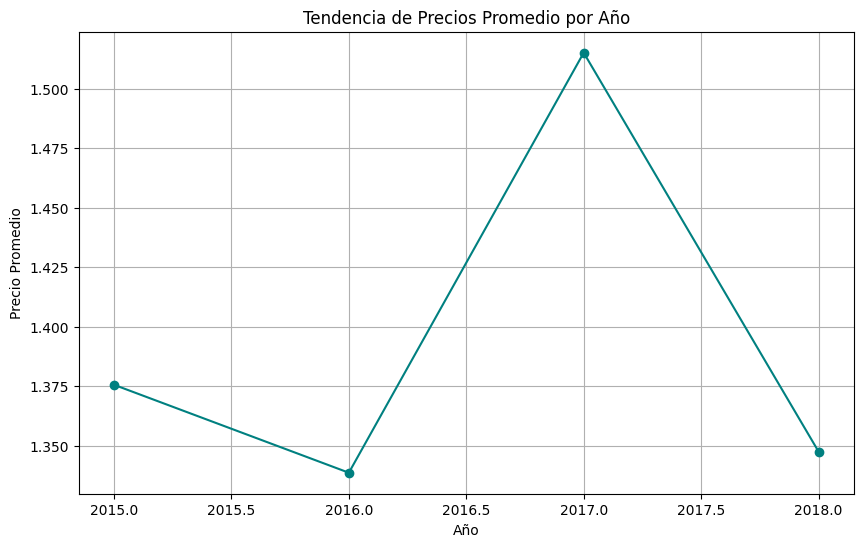

In [ ]:
# Agrupar por año y calcular el promedio de precios
annual_prices = data.groupby('Year')['AveragePrice'].mean()

# Gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(annual_prices.index, annual_prices.values, marker='o', linestyle='-', color='teal')
plt.title('Tendencia de Precios Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.grid()
plt.show()